In [1]:
from fbprophet import Prophet
from torch.utils.data.sampler import SubsetRandomSampler


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
bdenv_loc = '/content/drive/My Drive/Colab Notebooks/data/733project/Neighbourhood_model_data.csv'
#bdata = os.path.join(bdenv_loc,'data')

In [15]:
df = pd.read_csv(bdenv_loc)
df.dtypes

NEIGHBOURHOOD_NAME        object
TAX_ASSESSMENT_YEAR        int64
PREVIOUS_MEDIAN_PRICE    float64
INTEREST_RATE            float64
CURRENT_MEDIAN_PRICE     float64
dtype: object

In [17]:
df.index = pd.to_datetime(df['TAX_ASSESSMENT_YEAR'], format='%Y')
df

,NEIGHBOURHOOD_NAME,TAX_ASSESSMENT_YEAR,PREVIOUS_MEDIAN_PRICE,INTEREST_RATE,CURRENT_MEDIAN_PRICE
TAX_ASSESSMENT_YEAR,,,,,
2007-01-01,Arbutus-Ridge,2007,0.80475,6.104167,1.01700
2008-01-01,Arbutus-Ridge,2008,1.01700,4.729167,1.22905
2009-01-01,Arbutus-Ridge,2009,1.22905,2.395833,1.23490
2010-01-01,Arbutus-Ridge,2010,1.23490,2.604167,1.22900
2011-01-01,Arbutus-Ridge,2011,1.22900,3.000000,1.51500
2012-01-01,Arbutus-Ridge,2012,1.51500,3.000000,1.90910
2013-01-01,Arbutus-Ridge,2013,1.90910,3.000000,1.82600
2014-01-01,Arbutus-Ridge,2014,1.82600,3.000000,1.82455
2015-01-01,Arbutus-Ridge,2015,1.82455,2.775000,1.98200


In [28]:
area_name = 'Arbutus-Ridge'
df = df.query('NEIGHBOURHOOD_NAME == @area_name')
df

,NEIGHBOURHOOD_NAME,TAX_ASSESSMENT_YEAR,PREVIOUS_MEDIAN_PRICE,INTEREST_RATE,CURRENT_MEDIAN_PRICE
TAX_ASSESSMENT_YEAR,,,,,
2007-01-01,Arbutus-Ridge,2007,0.80475,6.104167,1.01700
2008-01-01,Arbutus-Ridge,2008,1.01700,4.729167,1.22905
2009-01-01,Arbutus-Ridge,2009,1.22905,2.395833,1.23490
2010-01-01,Arbutus-Ridge,2010,1.23490,2.604167,1.22900
2011-01-01,Arbutus-Ridge,2011,1.22900,3.000000,1.51500
2012-01-01,Arbutus-Ridge,2012,1.51500,3.000000,1.90910
2013-01-01,Arbutus-Ridge,2013,1.90910,3.000000,1.82600
2014-01-01,Arbutus-Ridge,2014,1.82600,3.000000,1.82455
2015-01-01,Arbutus-Ridge,2015,1.82455,2.775000,1.98200


In [30]:
# convert published column from string type to date type
truncated_df = df[['CURRENT_MEDIAN_PRICE']]

,CURRENT_MEDIAN_PRICE
TAX_ASSESSMENT_YEAR,
2007-01-01,1.01700
2008-01-01,1.22905
2009-01-01,1.23490
2010-01-01,1.22900
2011-01-01,1.51500
2012-01-01,1.90910
2013-01-01,1.82600
2014-01-01,1.82455
2015-01-01,1.98200


In [31]:
truncated_df

,CURRENT_MEDIAN_PRICE
TAX_ASSESSMENT_YEAR,
2007-01-01,1.01700
2008-01-01,1.22905
2009-01-01,1.23490
2010-01-01,1.22900
2011-01-01,1.51500
2012-01-01,1.90910
2013-01-01,1.82600
2014-01-01,1.82455
2015-01-01,1.98200


In [32]:
data = truncated_df.reset_index()
data

,TAX_ASSESSMENT_YEAR,CURRENT_MEDIAN_PRICE
0,2007-01-01,1.01700
1,2008-01-01,1.22905
2,2009-01-01,1.23490
3,2010-01-01,1.22900
4,2011-01-01,1.51500
5,2012-01-01,1.90910
6,2013-01-01,1.82600
7,2014-01-01,1.82455
8,2015-01-01,1.98200
9,2016-01-01,2.36600


In [33]:
data.columns = ['ds', 'y']
data

,ds,y
0,2007-01-01,1.01700
1,2008-01-01,1.22905
2,2009-01-01,1.23490
3,2010-01-01,1.22900
4,2011-01-01,1.51500
5,2012-01-01,1.90910
6,2013-01-01,1.82600
7,2014-01-01,1.82455
8,2015-01-01,1.98200
9,2016-01-01,2.36600


In [40]:
# train validate split
prediction_size = 3

train_df = data[:-prediction_size]
train_df


,ds,y
0,2007-01-01,1.01700
1,2008-01-01,1.22905
2,2009-01-01,1.23490
3,2010-01-01,1.22900
4,2011-01-01,1.51500
5,2012-01-01,1.90910
6,2013-01-01,1.82600
7,2014-01-01,1.82455
8,2015-01-01,1.98200
9,2016-01-01,2.36600


In [60]:
validation_df = data[-prediction_size:]
validation_df

,ds,y
10,2017-01-01,3.247
11,2018-01-01,3.138
12,2019-01-01,2.789


In [61]:
# create prophet model and fit on the dataset
m = Prophet()
m.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.0.


In [70]:
future = data[['ds']]
future

,ds
0,2007-01-01
1,2008-01-01
2,2009-01-01
3,2010-01-01
4,2011-01-01
5,2012-01-01
6,2013-01-01
7,2014-01-01
8,2015-01-01
9,2016-01-01


In [71]:
forecast = m.predict(future)
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-01-01,1.009197,1.009197,1.009197,0.912568,1.142567,0.022326,0.022326,0.022326,0.0,0.0,0.0,0.022326,0.022326,0.022326,1.031522
1,2008-01-01,1.142752,1.142752,1.142752,1.119918,1.348464,0.089152,0.089152,0.089152,0.0,0.0,0.0,0.089152,0.089152,0.089152,1.231904
2,2009-01-01,1.276673,1.276673,1.276673,1.058357,1.277992,-0.111280,-0.111280,-0.111280,0.0,0.0,0.0,-0.111280,-0.111280,-0.111280,1.165393
3,2010-01-01,1.410228,1.410228,1.410228,1.250561,1.483276,-0.044512,-0.044512,-0.044512,0.0,0.0,0.0,-0.044512,-0.044512,-0.044512,1.365716
4,2011-01-01,1.543783,1.543783,1.543783,1.445523,1.676510,0.022326,0.022326,0.022326,0.0,0.0,0.0,0.022326,0.022326,0.022326,1.566109
5,2012-01-01,1.677338,1.677338,1.677338,1.643034,1.881223,0.089152,0.089152,0.089152,0.0,0.0,0.0,0.089152,0.089152,0.089152,1.766490
6,2013-01-01,1.811259,1.811259,1.811259,1.585648,1.818040,-0.111280,-0.111280,-0.111280,0.0,0.0,0.0,-0.111280,-0.111280,-0.111280,1.699979
7,2014-01-01,1.944814,1.944814,1.944814,1.783695,2.011672,-0.044512,-0.044512,-0.044512,0.0,0.0,0.0,-0.044512,-0.044512,-0.044512,1.900302
8,2015-01-01,2.078369,2.078369,2.078369,1.982968,2.211009,0.022326,0.022326,0.022326,0.0,0.0,0.0,0.022326,0.022326,0.022326,2.100695
9,2016-01-01,2.211924,2.211924,2.211924,2.184879,2.411095,0.089152,0.089152,0.089152,0.0,0.0,0.0,0.089152,0.089152,0.089152,2.301076


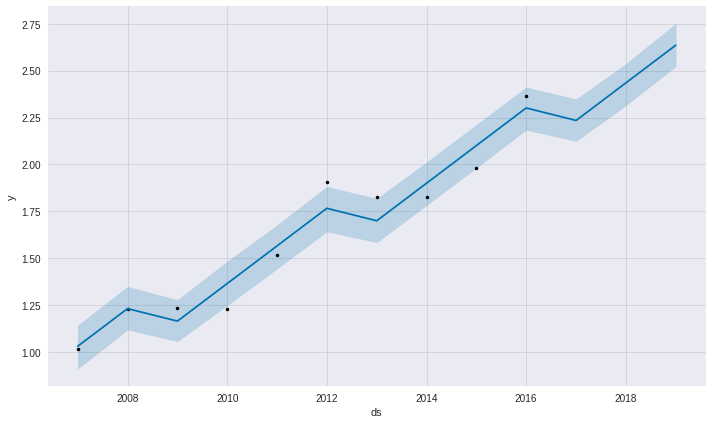

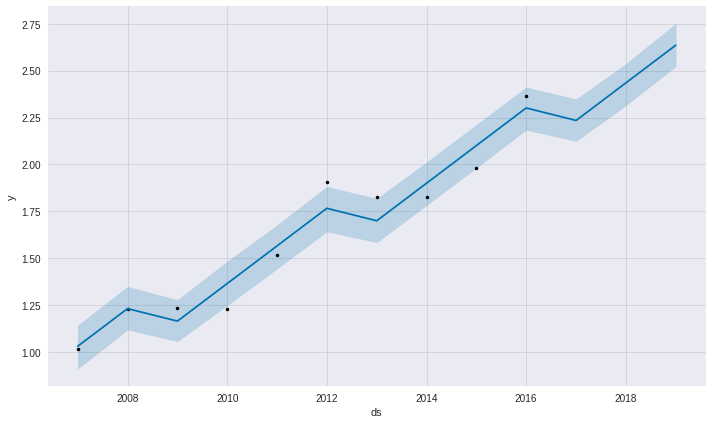

In [72]:
m.plot(forecast)

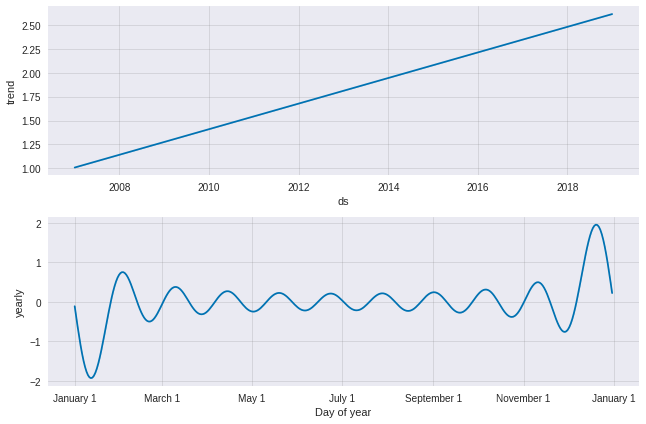

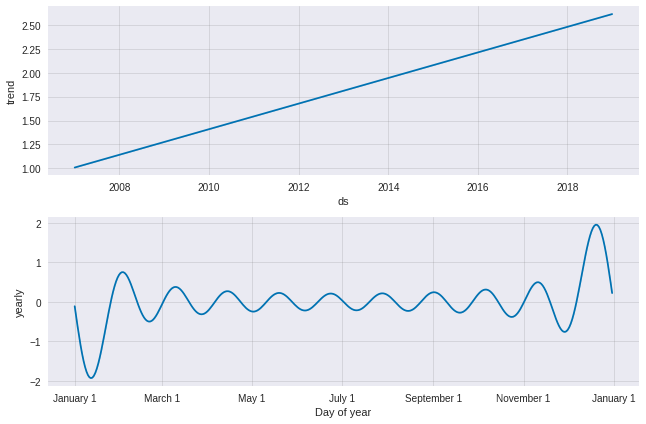

In [73]:
# plot components
m.plot_components(forecast)

In [0]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [0]:
cmp_df = make_comparison_dataframe(data, forecast)

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val = sqrt(mean_squared_error(cmp_df['yhat'], cmp_df['y']))

rmse_val

0.3540572292935188